In [10]:
source("module.R")


slope <- function (q, p) {
    function(e1, e2) {
        diff <- e1 - e2
        if (diff < q) return(0)
        if (diff > p) return(1)
        return (diff - q) / (p - q) 
    }
}

basic <- function(q, p) { function(e1, e2) {
    if (e1 > e2) return(1)
    return(0)
} }

n = 8
c = 5
peformanceTable <- matrix(runif(n*c, min=0, max=10), nrow=n, byrow=FALSE) 

dataFrame <- as.data.frame(
    peformanceTable,
    row.names=c("A1","A2","A3","A4","A5","A6","A7","A8"),
)
colnames(dataFrame) = c('crit1', 'crit2', 'crit3','crit4', 'crit5')
criteriaFn <- lapply(seq(c), function(x) { basic(1, 2) })

preferenceCube <- calculatePreference(dataFrame, criteriaFn)
negativeFlows <- calculateCriteriaNegativeFlows(preferenceCube)

positiveFlows <- calculateCriteriaPositiveFlows(preferenceCube)


In [155]:

flows <- (positiveFlows - negativeFlows)

pca <- prcomp(flows)

print(as.data.frame(unlist(pca)))
rotation <- pca[['rotation']]

points <- flows %*% rotation
points <- as.data.frame(points[,1:2])

criteria_points <- (diag(dim(flows)[2]) %*% rotation)[,1:2]
criteria_points <- as.data.frame(criteria_points, row.names=colnames(flows))

weights <- c(1, 1, 1)
weights <- matrix(weights / sqrt(sum(weights)), nrow=1, ncol=3)
decision_stick <- as.matrix((weights %*% rotation)[,1:2])
decision_stick <- as.data.frame(t(decision_stick), col.names=c("PC1", "PC2"))

print(points)
print(decision_stick)

               unlist(pca)
sdev1         1.088662e+00
sdev2         9.077080e-01
sdev3         4.616311e-01
rotation1     7.071068e-01
rotation2     5.551115e-16
rotation3     7.071068e-01
rotation4    -2.609565e-01
rotation5    -9.294103e-01
rotation6     2.609565e-01
rotation7    -6.571923e-01
rotation8     3.690482e-01
rotation9     6.571923e-01
center.crit1  0.000000e+00
center.crit2  0.000000e+00
center.crit3  0.000000e+00
scale         0.000000e+00
x1           -9.428090e-01
x2            9.428090e-01
x3            9.428090e-01
x4           -9.428090e-01
x5           -1.358324e-01
x6            1.103381e+00
x7           -1.103381e+00
x8            1.358324e-01
x9            5.611443e-01
x10           6.908002e-02
x11          -6.908002e-02
x12          -5.611443e-01
         PC1        PC2
A1 -0.942809 -0.1358324
A2  0.942809  1.1033812
A3  0.942809 -1.1033812
A4 -0.942809  0.1358324
        PC1        PC2
1 0.8164966 -0.5365953


In [4]:
library(ggplot2)

## My Plot

In [9]:
x_upper_bound <- max(points$PC1, decision_stick$PC1, criteria_points$PC1)*1.1
y_upper_bound <- max(points$PC2, decision_stick$PC2, criteria_points$PC2)*1.1
x_lower_bound <- min(points$PC1, decision_stick$PC1, criteria_points$PC1)*1.1
y_lower_bound <- min(points$PC2, decision_stick$PC2, criteria_points$PC2)*1.1

ggplot(points, aes(x=PC1, y=PC2)) + 
    geom_hline(yintercept=0, color="grey68") +
    geom_vline(xintercept=0, color="grey68") +
    geom_point(size=2, shape=15) +
    geom_text(
        data=points,
        aes(label=row.names(points), x=PC1, y=PC2),
        nudge_x = 0.05,
        nudge_y=0.05
    ) +
    geom_segment(
        data=criteria_points,
        inherit.aes=FALSE,
        aes(xend=PC1, yend=PC2),
        x=0,
        y=0,
        color="darkslategray4",
        arrow=arrow(length=unit(0.30,"cm"), type = "closed")
    ) +
    geom_text(
        data=criteria_points,
        aes(label=row.names(criteria_points), x=PC1/2, y=PC2/2),
        colour="darkslategray",
        nudge_x = 0.03,
        nudge_y=0.03
    ) +
    geom_segment(
        data=decision_stick,
        inherit.aes=FALSE,
        aes(xend=PC1, yend=PC2),
        x=0,
        y=0,
        color="chocolate1",
        arrow=arrow(length=unit(0.30,"cm"), type = "closed")
    ) +
    geom_segment(
        data=decision_stick,
        inherit.aes=FALSE,
        aes(
            x=PC1*-100,
            y=PC2*-100,
            xend=PC1*100,
            yend=PC2*100,
        ),
        color="chocolate1",
        linetype="dashed",
        arrow=arrow(length=unit(0.30,"cm"), type = "closed")
    ) +
    geom_text(
        data=decision_stick,
        label="D",
        aes(x=PC1/2, y=PC2/2),
        colour="chocolate3",
        nudge_x = 0.05,
        nudge_y=0.05
    ) +
    coord_cartesian(ylim=c(y_lower_bound, y_upper_bound), xlim=c(x_lower_bound, x_upper_bound))



ERROR: Error in points$PC1: object of type 'closure' is not subsettable


## REF

In [11]:
library(factoextra)


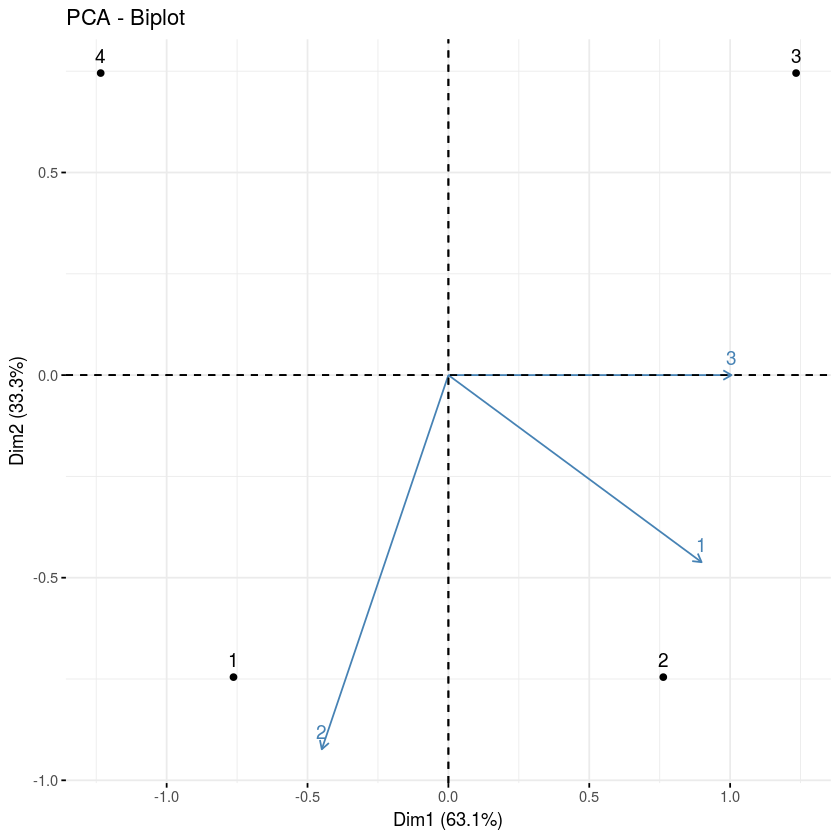

In [20]:
fviz_pca_biplot(pca)

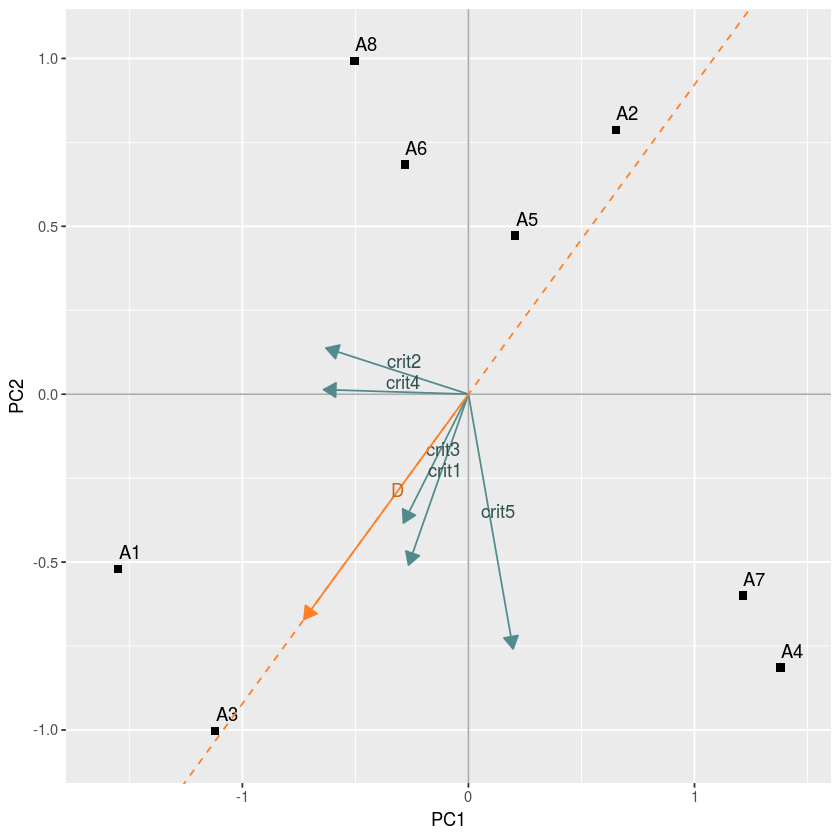

In [11]:
GAIAPlain(positiveFlows - negativeFlows)